In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Larger CNN for the MNIST Dataset
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils.vis_utils import plot_model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


In [5]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [6]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')


In [7]:
X_train.shape
X_test.shape

(10000, 28, 28, 1)

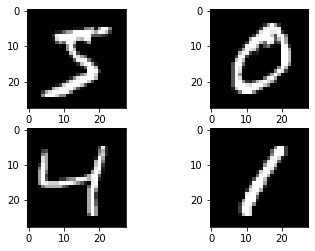

In [8]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [9]:
y_train[:4]

array([5, 0, 4, 1], dtype=uint8)

In [10]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


In [11]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [12]:
# create model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


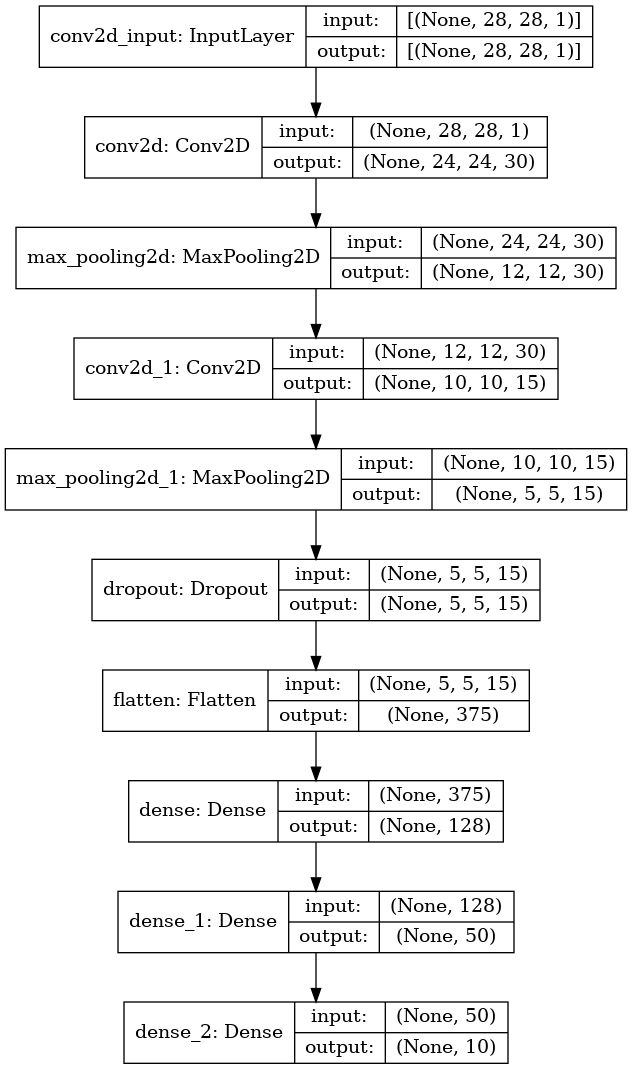

In [13]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
# Fit the model
model_history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)


Epoch 1/10
300/300 [==============================] - 18s 57ms/step - loss: 0.8381 - accuracy: 0.7230 - val_loss: 0.0946 - val_accuracy: 0.9703
Epoch 2/10
300/300 [==============================] - 15s 50ms/step - loss: 0.1119 - accuracy: 0.9661 - val_loss: 0.0521 - val_accuracy: 0.9831
Epoch 3/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0776 - accuracy: 0.9758 - val_loss: 0.0447 - val_accuracy: 0.9845
Epoch 4/10
300/300 [==============================] - 15s 51ms/step - loss: 0.0583 - accuracy: 0.9815 - val_loss: 0.0338 - val_accuracy: 0.9885
Epoch 5/10
300/300 [==============================] - 15s 49ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.0311 - val_accuracy: 0.9891
Epoch 6/10
300/300 [==============================] - 15s 49ms/step - loss: 0.0417 - accuracy: 0.9866 - val_loss: 0.0290 - val_accuracy: 0.9900
Epoch 7/10
300/300 [==============================] - 15s 51ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0281 - val_accuracy:

In [16]:
model.save('Model/model.h5')

In [17]:
model = keras.models.load_model('Model/model.h5')

In [18]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 300}

In [19]:
model_history.history

{'loss': [0.402901291847229,
  0.10046213120222092,
  0.07300121337175369,
  0.05799402669072151,
  0.0493045412003994,
  0.0439109206199646,
  0.03877107799053192,
  0.03617973253130913,
  0.0330684594810009,
  0.03055563010275364],
 'accuracy': [0.8712833523750305,
  0.969083309173584,
  0.9775999784469604,
  0.9818333387374878,
  0.9841333627700806,
  0.9861999750137329,
  0.9878000020980835,
  0.9882500171661377,
  0.9893666505813599,
  0.9898999929428101],
 'val_loss': [0.09459862858057022,
  0.05213480815291405,
  0.04470660537481308,
  0.033827077597379684,
  0.03108455240726471,
  0.02903563529253006,
  0.028138158842921257,
  0.030033599585294724,
  0.025268392637372017,
  0.027798807248473167],
 'val_accuracy': [0.970300018787384,
  0.9830999970436096,
  0.984499990940094,
  0.9884999990463257,
  0.9890999794006348,
  0.9900000095367432,
  0.9909999966621399,
  0.9901000261306763,
  0.9914000034332275,
  0.9909999966621399]}

[]

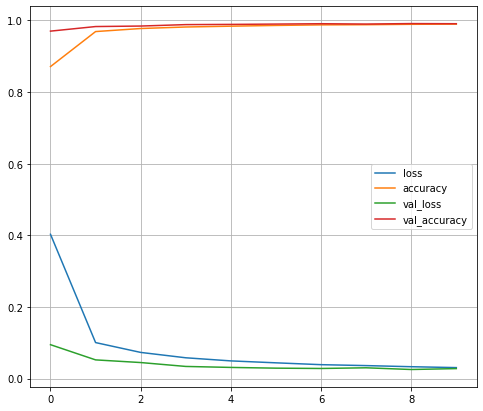

In [20]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,7))
plt.grid()
plt.plot()

In [21]:
model.evaluate(X_test,y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0278 - accuracy: 0.9910


[0.02779880352318287, 0.9909999966621399]